In [32]:
import pandas as pd

In [33]:
data = pd.read_csv("/home/joseph/Downloads/Iris.csv")

In [34]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
data = data.drop("Id",axis=1)

In [36]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.shape

(150, 5)

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
map_dict = {"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2}

In [9]:
data['Species'] = data['Species'].map(map_dict)

In [10]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#checking for outlier values
import seaborn as sns
import matplotlib.pyplot as plt

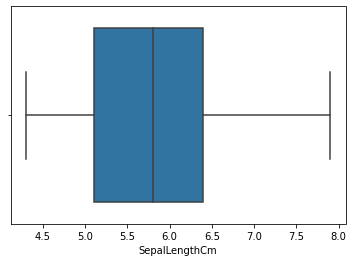

In [13]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['SepalLengthCm'],orient='h')

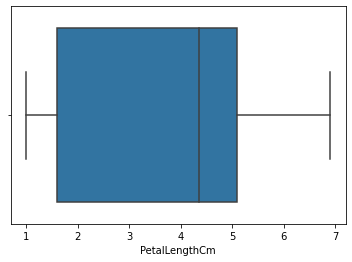

In [14]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['PetalLengthCm'],orient='h')

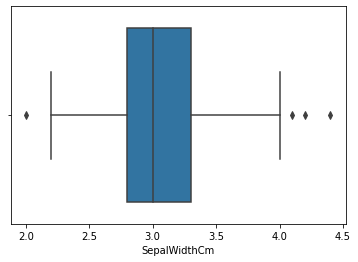

In [15]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['SepalWidthCm'],orient='h')

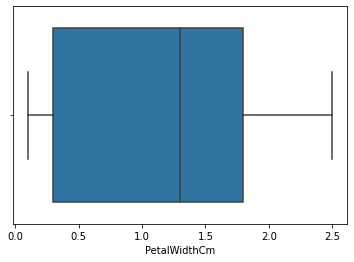

In [16]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['PetalWidthCm'],orient='h')

In [17]:
# Sepal Width has outlier values

In [18]:
descr = data["SepalWidthCm"].describe()
IQR = descr['75%'] - descr['25%']
upper_limit =  descr['75%'] + 1.5 * IQR
lower_limit =  descr['25%'] - 1.5 * IQR  
#outlier replacement
data["SepalWidthCm"][data["SepalWidthCm"]>upper_limit] = upper_limit
data["SepalWidthCm"][data["SepalWidthCm"]<lower_limit] = lower_limit

<ipython-input-18-2c19c72454fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SepalWidthCm"][data["SepalWidthCm"]>upper_limit] = upper_limit
<ipython-input-18-2c19c72454fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SepalWidthCm"][data["SepalWidthCm"]<lower_limit] = lower_limit


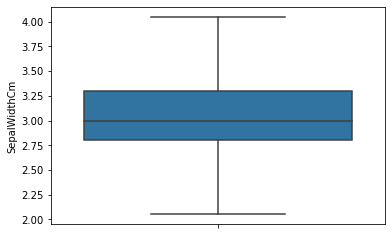

In [19]:
#for visualizing boxplot we use seaborn
sns.boxplot(data['SepalWidthCm'],orient='v')

In [20]:
y = data['Species']
X = data.drop('Species',axis=1)

In [21]:
from sklearn.model_selection import train_test_split #this funciton split x and y randomnly-
#so for each time the output will be diffrent.to keep the data consistant we have to set a seed.random_state!=0, we are setting a seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) #0.67 data will be for training.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
classifier=LogisticRegression() #creating a Logistic Regression object
classifier.fit(X_train,y_train) #command for training / fitting the model

/home/joseph/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
ypred = classifier.predict(X_test)

In [25]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.98

In [26]:
classifier.score(X_test,y_test)  #Accurcy score for testing

0.98

In [27]:
classifier.score(X_train,y_train)  #Accurcy score for training

0.97

### Confussion Matrix


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

### Assume we are predicting breast tumor is benign or malignant

#### true positives (TP): These are cases in which we predicted yes (they have the malignant), and they do have the malignant.
#### true negatives (TN): We predicted no, and they don't have the malignant.
#### false positives (FP): We predicted yes, but they don't actually have the malignant. (Also known as a "Type I error.")
#### false negatives (FN): We predicted no, but they actually do have the malignant. (Also known as a "Type II error.")

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,ypred)  #diagonal values are the correct predictions,TRUE predictions

array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 16]])

In [30]:
accuracy = (17+16+16) /(17+16+16+1)
accuracy

0.98

In [31]:
#END